# In this notebook
I am using this notebook for testing ongoing changes to the code repo. Only use this
as an example of how to get code up and running for analysis.

In [1]:
import Datasets

In [34]:
data_path = './data/raleigh/'
dump_path =  './results/'
data_dump_path =  './results/'

train_data, test_data = Datasets.load(data_path, data_dump_path)

/Users/zdc6/Desktop/twitter/sPFA/Datasets/twitter.py:249: RuntimeWarning: divide by zero encountered in long_scalars
  w = [np.float32(1 / e) for e in eff_label_dist]
/Users/zdc6/Desktop/twitter/sPFA/Datasets/twitter.py:250: RuntimeWarning: invalid value encountered in divide
  return w / np.sum(w)


<BarContainer object of 21 artists>

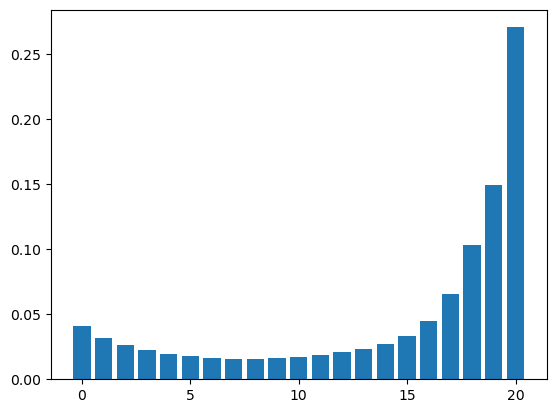

In [8]:
from matplotlib import pyplot as plt
plt.bar(range(len(train.LDS.weights)), train.LDS.weights)

In [9]:
import os
f = os.listdir('~/Desktop/twitter/sPFA/data/raleigh/')

AttributeError: module 'os' has no attribute 'listdirs'

In [11]:
import pandas as pd

df = pd.read_csv('./results/debug/performance.csv')
df.head()

,stage,epoch,loss,pnll,mse,kld,time,kld_weight
0,train,0,57.393106,27.761732,29.631374,32.919098,0.026074,0.00
1,test,0,68.977505,14.578708,54.398796,0.000000,0.000056,0.00
2,train,1,25.385951,12.430481,12.162876,79.259456,0.025338,0.01
3,test,1,114.372944,9.599406,104.773537,0.000000,0.000055,0.01
4,train,2,18.735734,7.323272,8.868262,127.209990,0.027087,0.02


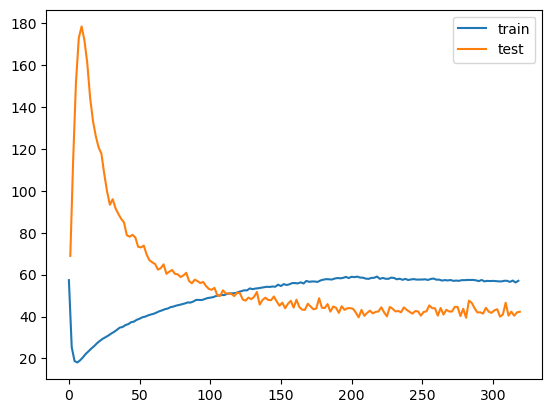

In [14]:
train = df[df['stage'] == 'train']
test = df[df['stage'] == 'test']
plt.plot(train['loss'], label='train')
plt.plot(test['loss'], label='test')
plt.legend()

In [15]:
import torch

In [76]:
state_dict = torch.load('./results/debug/best.pt')

In [22]:
import joblib
cv = joblib.load('./results/1000/1/0.05/0.8/cv.joblib')

In [77]:
import Models
model = Models.load('base', {
    'vocab': len(cv.vocabulary_),
    'num_components': 50
})

In [78]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [71]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [79]:
all_ys = []
preds = []
all_mus = []
with torch.no_grad():
    for i, (X, y, w) in enumerate(train_loader):
        all_ys.extend(y.numpy())
        recon, y_hat, mu, logvar = model(X)
        preds.extend(y_hat.numpy())
        all_mus.extend(mu.numpy())



In [80]:
# Convert to numpy
import numpy as np
all_ys = np.array(all_ys)
preds = np.array(preds)
all_mus = np.array(all_mus)

In [89]:
# Analyze the output values
all_mus.std(axis=0)

array([0.21717104, 0.25671354, 0.24549694, 0.24887694, 0.2694116 ,
       0.21312068, 0.27841014, 0.22559068, 0.22252053, 0.26508817,
       0.267384  , 0.24595864, 0.2540147 , 0.23502788, 0.2158662 ,
       0.25635207, 0.26141214, 0.26043263, 0.22131656, 0.22738254,
       0.25570017, 0.25655723, 0.22920188, 0.23574385, 0.25217065,
       0.22276524, 0.24605498, 0.24231301, 0.2579893 , 0.22535995,
       0.24486913, 0.24215272, 0.25598273, 0.23475227, 0.24953991,
       0.25255668, 0.24893819, 0.24762718, 0.24303964, 0.2325952 ,
       0.26224706, 0.277013  , 0.2622732 , 0.23342137, 0.2619891 ,
       0.24777547, 0.23696068, 0.24831751, 0.27041224, 0.28244984],
      dtype=float32)

In [82]:
import numpy as np
all_ys = np.array(all_ys)
preds = np.array(preds)
all_mus = np.array(all_mus)

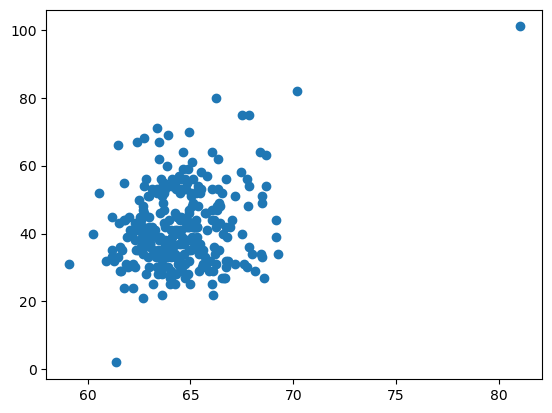

In [83]:
plt.scatter(preds, all_ys)

In [88]:
model.W_tilde

Parameter containing:
tensor([[0.6169, 0.9103, 0.2284,  ..., 0.4139, 0.1785, 0.3877],
        [0.1955, 0.9338, 0.3685,  ..., 0.7936, 0.4014, 0.6922],
        [0.5693, 0.2729, 0.6197,  ..., 0.2333, 0.9293, 0.9517],
        ...,
        [0.9413, 0.1410, 0.1042,  ..., 0.4030, 0.6115, 0.7009],
        [0.7608, 0.6935, 0.4556,  ..., 0.0019, 0.1126, 0.3031],
        [0.8796, 0.5380, 0.6953,  ..., 0.1479, 0.6175, 0.6410]],
       requires_grad=True)

In [53]:
all_mus.shape

(301, 7695)